# Behavioral Cloning Project


###  Introduction 

The objective of this behavioral cloning project is to be able to drive an simulation using training data. This is achieved by training a model to drive around a track by learning from a human driver. In the training mode the snapshots of the driver's view and the corresponding steering angle are captured. In the autonomous mode the view from the driver's side is used to predict the steering angle applied to drive the vehicles 



#### Steps
1. Data Collection
2. Data Processing 
3. Modelling 
4. Driving in Autonomous mode. 

In [1]:
import numpy as np
import cv2
import pandas as pd
import os
import random 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers import Convolution2D, Cropping2D
from keras.layers.advanced_activations import ELU

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Using TensorFlow backend.


In [19]:
def read_image(path,dir):
    return plt.imread(os.path.join(dir,os.path.basename(path)))

In [24]:
def flip_image(path,dir):
    image = read_image(path,dir)
    return cv2.flip(image,1)

In [3]:
def show_images(images, cmap = None): #Display a list of images in a grid 
    cols = 10
    rows = (len(images)+1)/cols
    plt.figure(figsize=(60,10))
    for i, image in enumerate(images):
        image.shape
        plt.subplot(rows,cols,i+1)
        if len(image.shape) > 2:
            cmap = 'BrBG'
        else:
            cmap='gray'
        plt.imshow(image,cmap)
    plt.show()

In [14]:
def hbarplot(labels,values, title = 'title',xlabel = 'label',ylabel='count',xsize = 10,ysize =60):
    #print(labels[0][1])
    #plt.figure(figsize=(xsize,ysize))
    fig, ax = plt.subplots()
    fig.set_size_inches(18.5, 18.5)
    width = 0.75 # the width of the bars 
    ind = np.arange(len(values))  # the x locations for the groups
    ax.barh(ind, values, width, color="blue")
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(labels, minor=False)
    for i, v in enumerate(values):
        ax.text(v, i + .25, str(v), color='red', fontweight='bold')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 
    plt.show()

##  Data Collection: 


In [4]:
df = pd.read_csv("/home/william/Desktop/driving_log.csv")
df.columns = ['center', 'left', 'right', 'steering_angle', 'throttle', 'brake', 'speed']


sample_image = []

images_paths = df['center'].tolist()
sample_image = sample_image.append(random.choice(images_paths))



Sample of images from the center camera.


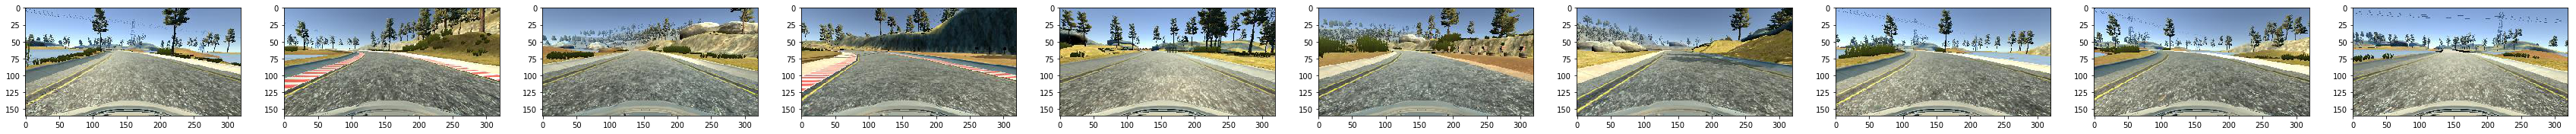

In [6]:
images_paths = df['center'].tolist()
sample_paths = [images_paths[i] for i in random.sample(range(len(images_paths)),10)]
images = [plt.imread(path) for path in sample_paths]
show_images(images)

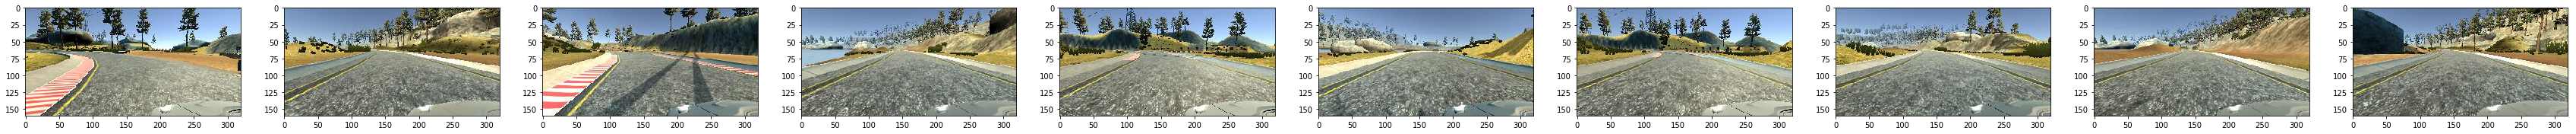

In [7]:
images_paths = df['left'].tolist()
sample_paths = [images_paths[i] for i in random.sample(range(len(images_paths)),10)]
images = [plt.imread(path) for path in sample_paths]
show_images(images)

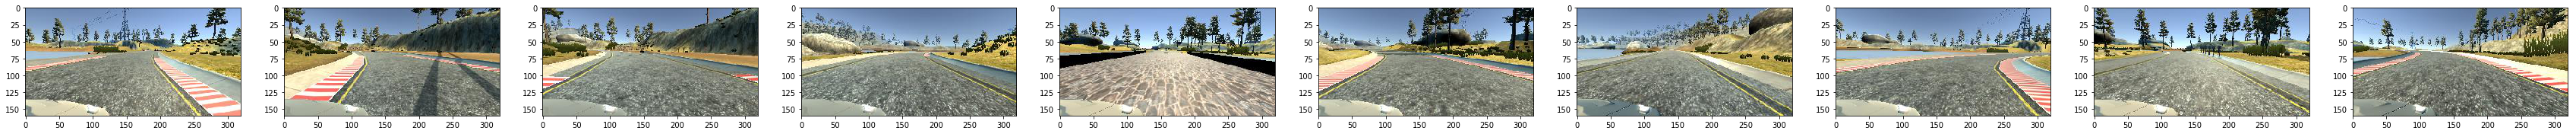

In [8]:
images_paths = df['right'].tolist()
sample_paths = [images_paths[i] for i in random.sample(range(len(images_paths)),10)]
images = [plt.imread(path) for path in sample_paths]
show_images(images)

In [10]:
hist

array([   8,    5,   26,  514, 9383, 4419,  640,    4,    5,    6])

In [11]:
bin_center = []

array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

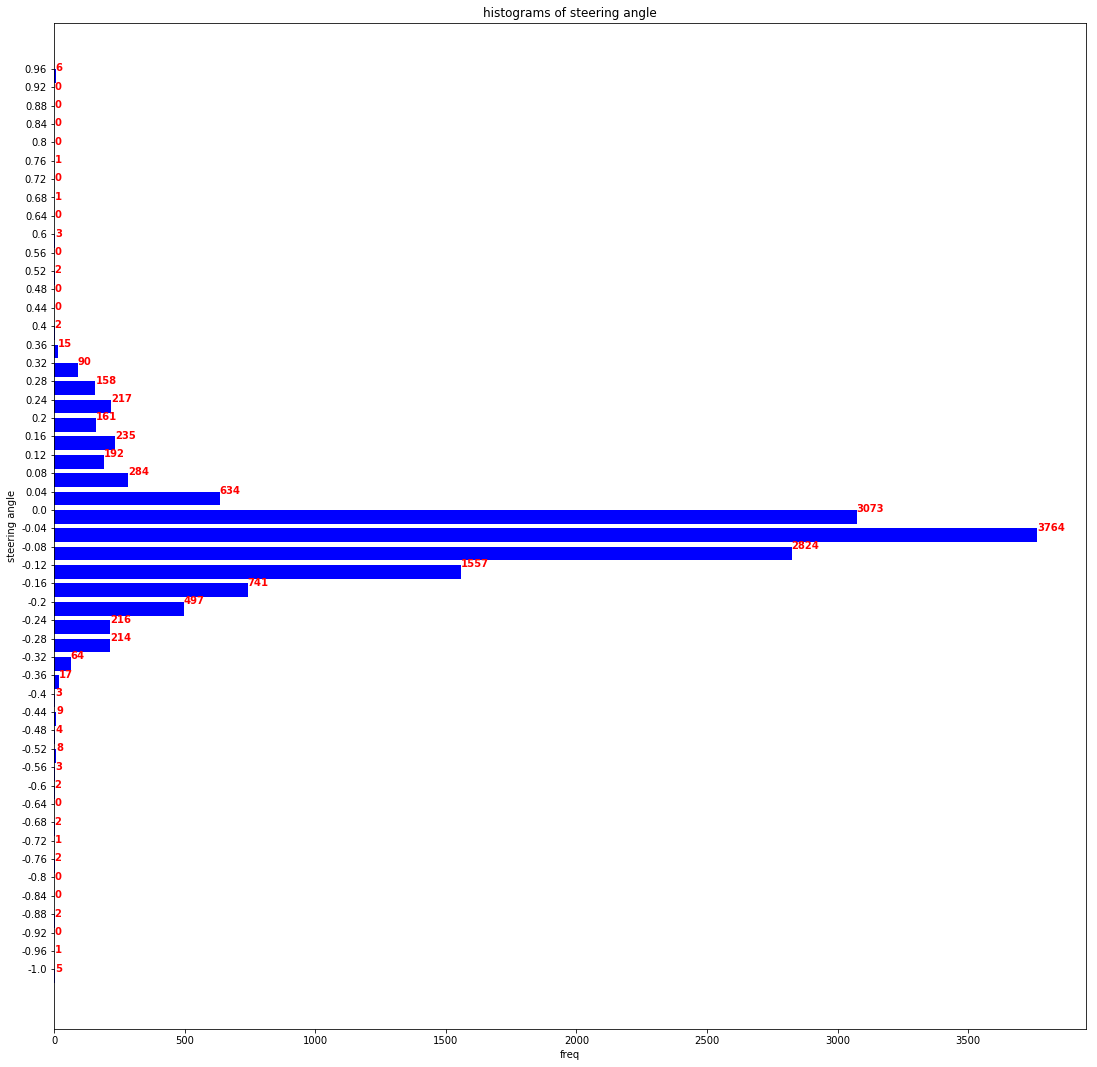

In [18]:
hist, bin_edges = np.histogram(df['steering_angle'],bins = 50)
hbarplot(bin_edges,hist, title = 'histograms of steering angle',xlabel = 'freq',ylabel='steering angle',xsize = 5,ysize =20)

In [ ]:
Filter the most common values to get a more balanced dataset 

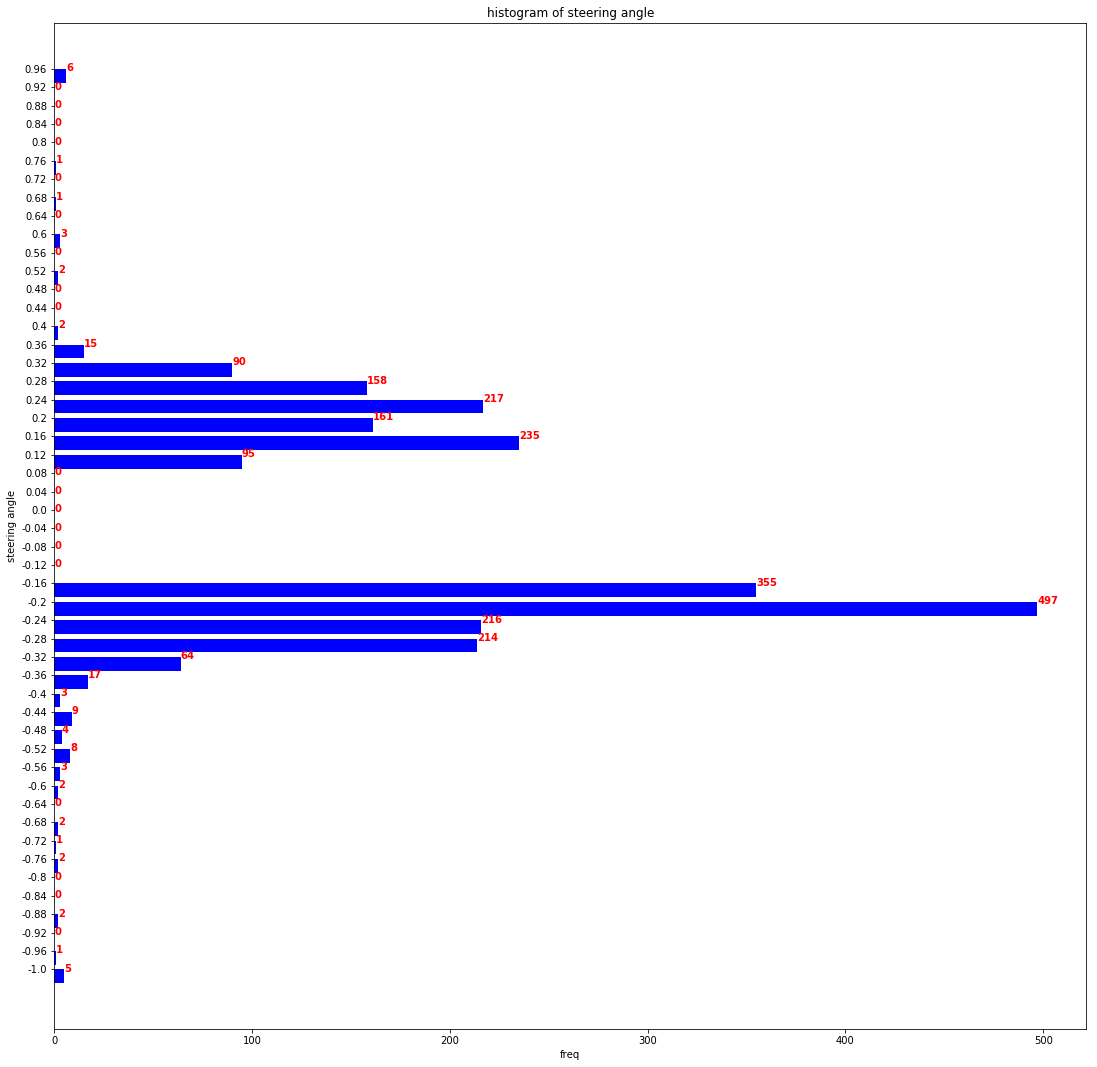

In [65]:
df_filtered_small_str = df[ abs(df.steering_angle) > 0.14]
hist, bin_edges = np.histogram(df_filtered_small_str['steering_angle'],bins = 50)
hbarplot(bin_edges,hist, title = 'histogram of steering angle',xlabel = 'freq',ylabel='steering angle',xsize = 5,ysize =20)


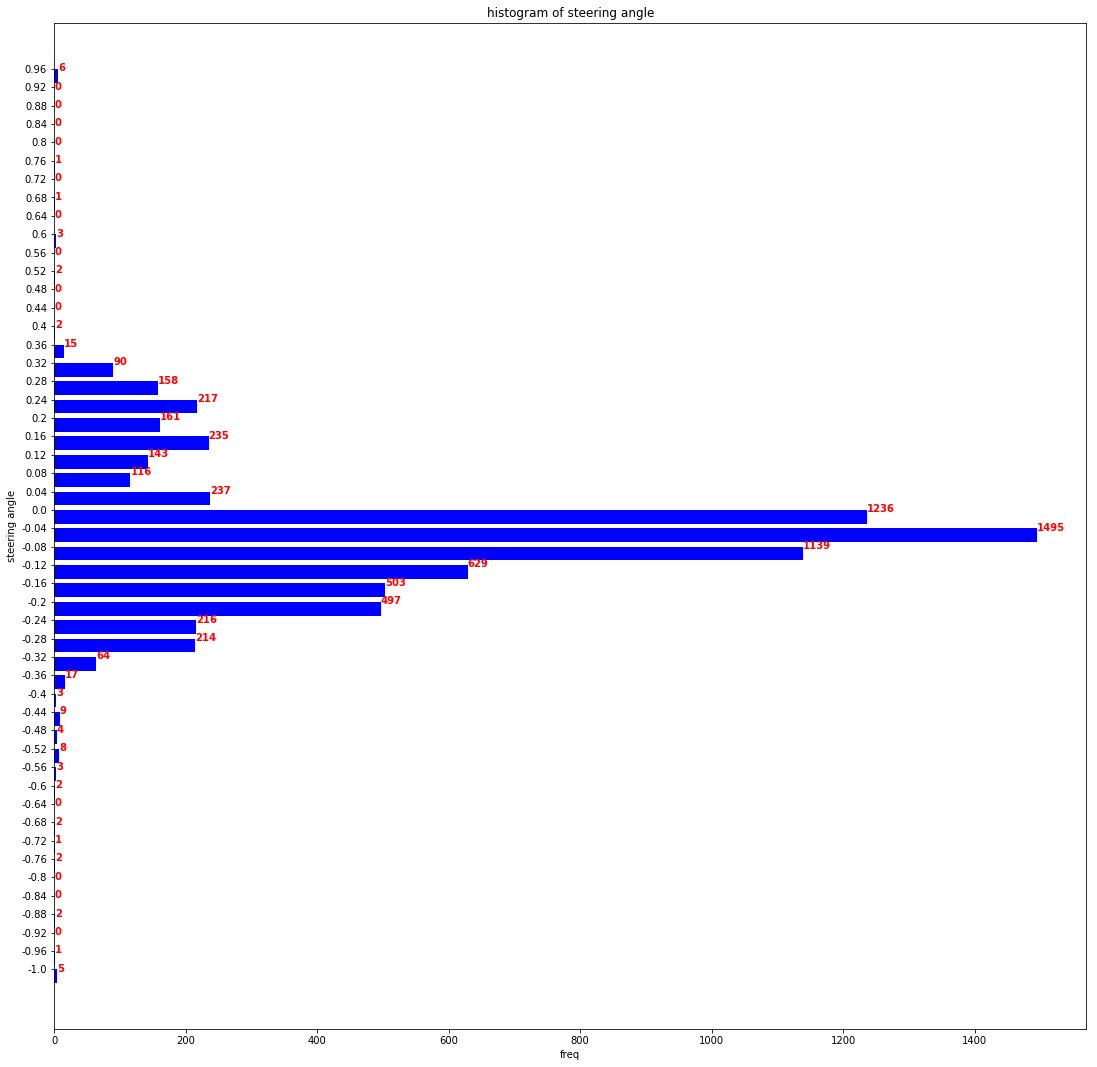

In [71]:

fraction_to_cull = 0.4
df_small_str = df[ abs(df.steering_angle) < 0.14]
df_frac_small = df_small_str.sample(frac=fraction_to_cull)
df_filtered = df_filtered_small_str.append(df_frac_small)
hist, bin_edges = np.histogram(df_filtered['steering_angle'],bins = 50)
hbarplot(bin_edges,hist, title = 'histogram of steering angle',xlabel = 'freq',ylabel='steering angle',xsize = 5,ysize =20)


Flip images . The top row shows original images, while the bottom row shows flipped images 

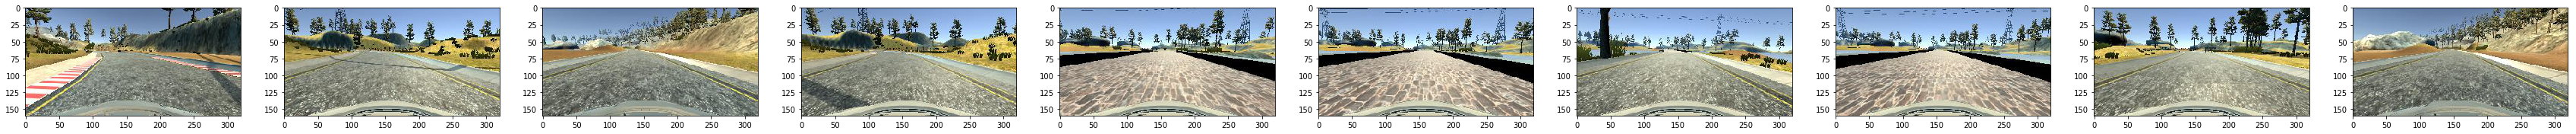

In [26]:
images_paths = df['center'].tolist()
sample_paths = [images_paths[i] for i in random.sample(range(len(images_paths)),10)]
images = [read_image(path,"/home/william/Desktop/IMG") for path in sample_paths]

show_images(images)


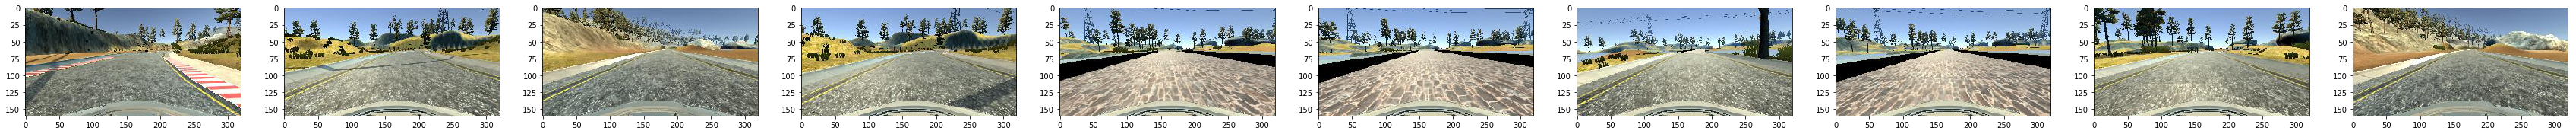

In [27]:
images_flipped = [flip_image(path,"/home/william/Desktop/IMG") for path in sample_paths]
show_images(images_flipped)

The histogram of steering angles shows an unbalances dataset with greater number of negative steering angles (because the track contains more left turns).
To balance the data set we flip steering angle along with a corresponding flip of the images using [cv2.flip()](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html#void flip(InputArray src, OutputArray dst, int flipCode) function.

In [68]:
y_org = np.array(df_filtered['steering_angle'])
y_flipped = np.array(df_filtered['steering_angle'])*(-1)
y_total = np.concatenate((y_org,y_flipped))

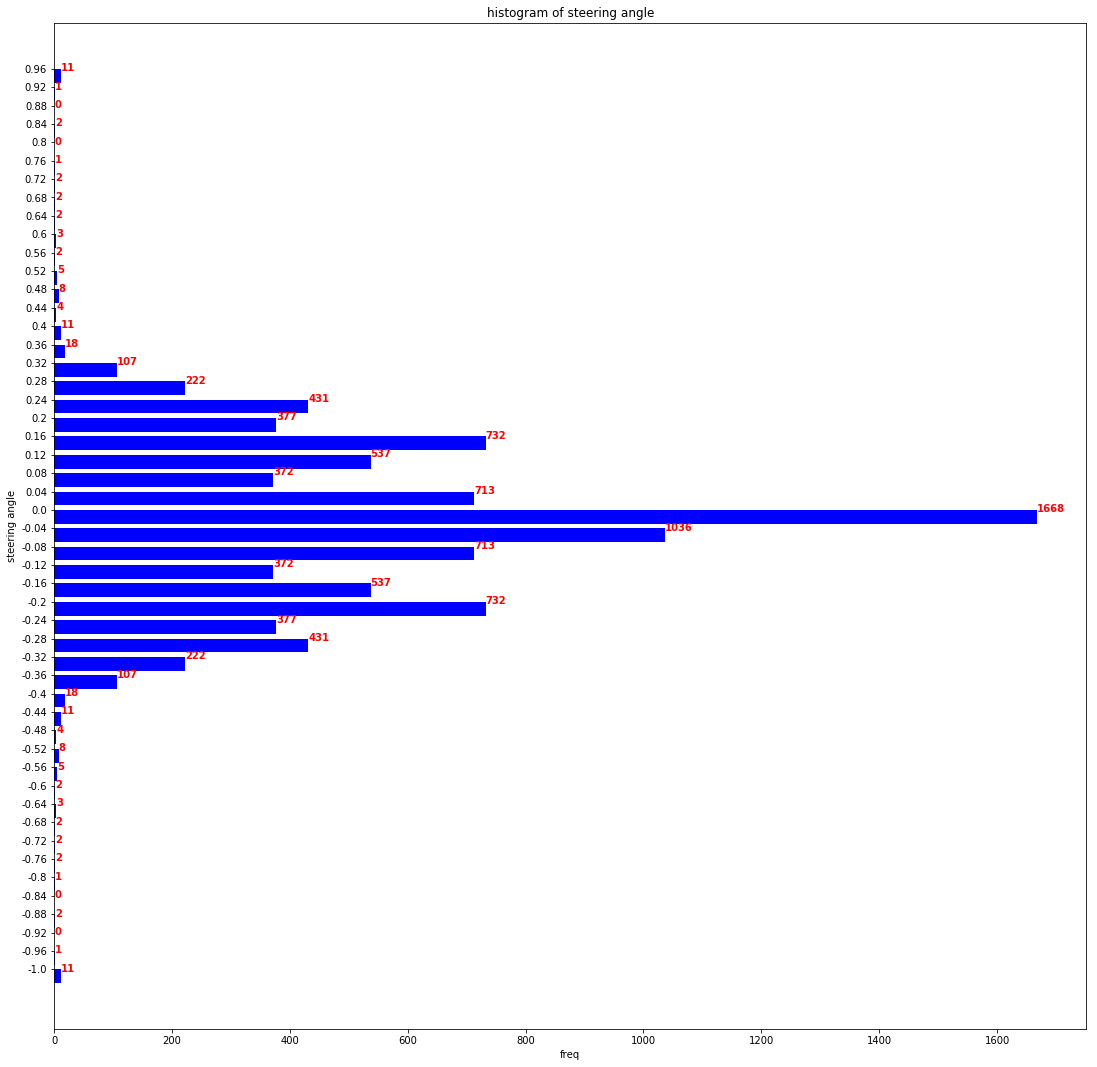

In [69]:
hist, bin_edges = np.histogram(y_total,bins = 50)
hbarplot(bin_edges,hist, title = 'histogram of steering angle',xlabel = 'freq',ylabel='steering angle',xsize = 5,ysize =20)

In [ ]:
Filtering the most frequent data. 
